In [2]:
import numpy as np
import pandas as pd
import math
import re
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
from IPython.display import Javascript
from datetime import datetime

script = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''

def notebook_save():
    Javascript(script)
    print('This notebook has been saved')
    
class bcolors:
    OK = '\033[92m\033[1m' #GREEN
    WARNING = '\033[93m\033[1m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR

In [57]:
def read_log(file_name, model_name=None, dataset=None):
    
    # read the files
    f = open(file_name, 'r')
    # store the lines and close the files
    lines = f.read().splitlines()
    f.close()

    # turn the file into dataframe
    df = pd.DataFrame(lines, columns = ['line'])

    # get rows that start and end the training
    start_training_row_no = df[df['line'].str.contains('Start training') == True].index.tolist()[0]
    end_training_row_no = df[df['line'].str.contains('Trained totally') == True].index.tolist()[0]

    # extract lines with Epoch info
    info = df[df['line'].str.contains('Epoch \[.*\]') == True].reset_index(drop=True)

    line_split = info['line'][0].split()
    
    # Get detail from the line
    index = [i for i, s in enumerate(line_split) if 'Epoch' in s]
    info['epoch'] = info['line'].apply(lambda x: x.split()[index[0]+1])
    # Get the train loss
    index = [i for i, s in enumerate(line_split) if 'train_loss:' in s]
    info['train_loss'] = info['line'].apply(lambda x: float(x.split()[index[0]+1][:-1]))
    # Get the val loss
    index = [i for i, s in enumerate(line_split) if 'val_loss:' in s]
    info['val_loss'] = info['line'].apply(lambda x: float(x.split()[index[0]+1][:-1]))
    # Get the learning rate
    index = [i for i, s in enumerate(line_split) if 'lr:' in s]
    info['lr'] = info['line'].apply(lambda x: float(x.split()[index[0]+1][:-1]))
    # Get the time taken
    info['time_taken'] = info['line'].apply(lambda x: float(x.split()[-1][:-1]))
        
#     return info['time_taken'], info['lr'], info['val_loss'], info['train_loss'], info['epoch']
    return info['time_taken'], info['lr'], info['val_loss'], info['train_loss'], info['epoch']
#     # generate figures
#     path = 'result' + '/' + model_name + '/'
#     try:
#         os.mkdir(path)
#     except FileExistsError:
#         pass    
#     fig_epoch_timeTaken = info.plot.line(x='epoch', y='time_taken',figsize=(10, 5), title='epoch and time_taken').get_figure()
#     fig_epoch_timeTaken.savefig(path + dataset + "_timeTaken_" + model_name + '.jpg')
#     plt.close()
#     fig_epoch_valLoss = info.plot.line(x='epoch', y='val_loss',figsize=(10, 5), title='epoch and val_loss').get_figure()
#     fig_epoch_valLoss.savefig(path + dataset + "_valLoss_" + model_name + '.jpg')
#     plt.close()
#     fig_epoch_trainLoss = info.plot.line(x='epoch', y='train_loss',figsize=(10, 5), title='epoch and train_loss').get_figure()
#     fig_epoch_trainLoss.savefig(path + dataset + "_trainLoss_" + model_name + '.jpg')
#     plt.close()
    
    
    
#     # statistics
#     stats = {
#         'max_epoch': int(re.search('\d+(?=\])', info['epoch'][0]).group(0)),
#         'val_loss_min': info['val_loss'].min(),
#         'train_loss_min': info['train_loss'].min(),
#         'train_loss_min_index': [info[info['train_loss'] == info['train_loss'].min()].index.tolist()],
#         'num_epoch': info.shape[0],
#         'time_taken_mean': info['time_taken'].mean(),
#         'time_taken_median': info['time_taken'].median(),
#         'time_taken_max': info['time_taken'].max(),
#         'time_taken_min': info['time_taken'].min(),
#         'time_taken_std': info['time_taken'].std()
#     }
#     # create a dataframe for exprting
#     df_stats = pd.DataFrame.from_dict(stats)
#     stats = df_stats.to_string()
#     # save to text file
#     text_file = open(path + dataset + '_' + model_name + "_stats.txt", "w")
#     n = text_file.write(stats)
#     text_file.close()
    
#     # datetime report
#     datetime_start_training = lines[start_training_row_no].split()[0]+ ' ' +lines[start_training_row_no].split()[1]
#     datetime_object_start_training = datetime.strptime(datetime_start_training, '%Y-%m-%d %H:%M:%S,%f')
#     datetime_end_training = lines[end_training_row_no].split()[0]+ ' ' +lines[end_training_row_no].split()[1]
#     datetime_object_end_training = datetime.strptime(datetime_end_training, '%Y-%m-%d %H:%M:%S,%f')
#     # calculate the duration of training
#     total_train_time = datetime_object_end_training - datetime_object_start_training
#     total_train_time_in_second = total_train_time.total_seconds()
#     total_train_time_in_minute = divmod(total_train_time_in_second, 60)[0]
#     total_train_time_in_hour = divmod(total_train_time_in_second, 3600)[0]
#     # save to the file
#     text_file = open(path + dataset + '_' + model_name + "_stats.txt", "a")
#     text_file.write('\n\nTotal training time (hrs): ' + str(total_train_time_in_hour) + ' hours')
#     text_file.write('\nTotal training time (sec): ' + str(total_train_time_in_second) + ' seconds')
#     text_file.write('\nTotal training time (min): ' + str(total_train_time_in_minute) + ' minutes')
#     text_file.write('\nStart training time: ' + str(datetime_start_training))
#     text_file.write('\nStart training time: ' + str(datetime_end_training))
#     text_file.close()



In [111]:
models = {'GWNET': 
          {'PEMS_BAY': {},
           'PEMS_BAY_0.5': {}
          },
          'STGCN':
          {'PEMS_BAY': {},
           'PEMS_BAY_0.5': {}
          },
          'DCRNN':
          {'PEMS_BAY': {},
           'PEMS_BAY_0.5': {}
          },
          'MTGNN':
          {'PEMS_BAY': {},
           'PEMS_BAY_0.5': {}
          },
          'TGCN':
          {'PEMS_BAY': {},
           'PEMS_BAY_0.5': {}
          },
          'RNN':
          {'PEMS_BAY': {},
           'PEMS_BAY_0.5': {}
          },
         }

# read_log_result = read_log(
#     '/Users/lunaryk/Desktop/Traffic-Demand-Evaluation/Bigscity-LibCity/libcity/log/51181-GWNET-PEMS_BAY_0.5-May-30-2022_13-26-58.log', 
#     'GWNET',
#     'PEMS_BAY_0.5'
# )

# models['GWNET']['PEMS_BAY_0.5']['time_taken'], models['GWNET']['PEMS_BAY_0.5']['lr'], models['GWNET']['PEMS_BAY_0.5']['val_loss'], models['GWNET']['PEMS_BAY_0.5']['train_loss'], models['GWNET']['PEMS_BAY_0.5']['epoch'] = read_log_result

postfix_path='../libcity/log/'
log_names = os.listdir('../libcity/log')
processed_files = {
    'success': 0,
    'failed': 0,
    'total': 0
}

for log_name in log_names:
    
    log_detail = log_name.split('-')
    if re.match(r'\d+', log_detail[0]):
        try:
            log_path = postfix_path + log_name
            read_log_result = read_log(log_path, log_detail[1], log_detail[2])
            models[log_detail[1]][log_detail[2]]['time_taken'], models[log_detail[1]][log_detail[2]]['lr'], models[log_detail[1]][log_detail[2]]['val_loss'], models[log_detail[1]][log_detail[2]]['train_loss'], models[log_detail[1]][log_detail[2]]['epoch'] = read_log_result
        except:
            print(bcolors.WARNING + log_name, "failed to load" + bcolors.RESET)
            processed_files['failed']+=1
        else:
            print(bcolors.OK + log_name, "loaded successfully" + bcolors.RESET)
            processed_files['success']+=1
        finally:
            processed_files['total']+=1
            
print(processed_files)


58804-RNN-PEMS_BAY-May-25-2022_22-12-20.log loaded successfully
26362-DCRNN-PEMS_BAY_0.5-May-26-2022_22-20-38.log loaded successfully
97760-STGCN-PEMS_BAY-May-28-2022_04-43-36.log loaded successfully
65598-RNN-PEMS_BAY_0.01-Jun-07-2022_12-26-51.log failed to load
58371-MTGNN-PEMS_BAY-Jun-01-2022_06-16-52.log loaded successfully
23573-CCRNN-PEMS_BAY_0.5-Jun-01-2022_06-12-46.log failed to load
47407-TGCN-PEMS_BAY_0.5-Jun-08-2022_10-08-29.log failed to load
37415-RNN-PEMS_BAY_0.5-May-28-2022_03-19-53.log loaded successfully
52425-CCRNN-PEMS_BAY-Jun-01-2022_06-04-00.log failed to load
36442-RNN-PEMS_BAY_0.5-May-25-2022_20-08-15.log loaded successfully
93691-DCRNN-PEMS_BAY_0.5-May-26-2022_22-00-29.log failed to load
45665-GWNET-PEMS_BAY-May-28-2022_16-44-07.log loaded successfully
58075-RNN-METR_LA-May-06-2022_21-56-29.log failed to load
13898-STGCN-PEMS_BAY_0.5-May-28-2022_13-25-32.log loaded successfully
38011-TGCN-PEMS_BAY-Jun-01-2022_13-14-37.log loaded successfully
89867-RNN-PEMS_BAY-M

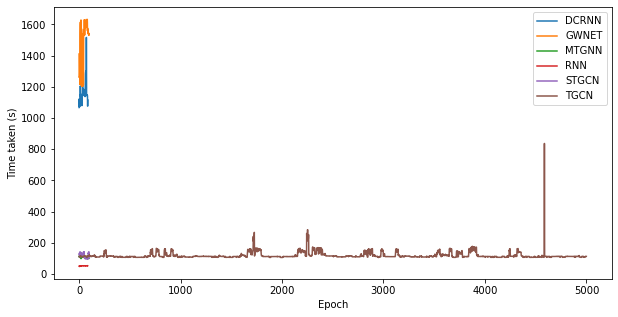

In [115]:
plt.figure(figsize=(10, 5))
plt.plot(range(0,87), models['DCRNN']['PEMS_BAY_0.5']['time_taken'], label='DCRNN')
plt.plot(range(0,100), models['GWNET']['PEMS_BAY_0.5']['time_taken'], label='GWNET')
plt.plot(range(0,100), models['MTGNN']['PEMS_BAY_0.5']['time_taken'], label='MTGNN')
plt.plot(range(0,86), models['RNN']['PEMS_BAY_0.5']['time_taken'], label='RNN')
plt.plot(range(0,100), models['STGCN']['PEMS_BAY_0.5']['time_taken'], label='STGCN')
plt.plot(range(0,5000), models['TGCN']['PEMS_BAY']['time_taken'], label='TGCN')
plt.xlabel("Epoch")
plt.ylabel("Time taken (s)")
plt.legend()
plt.show()

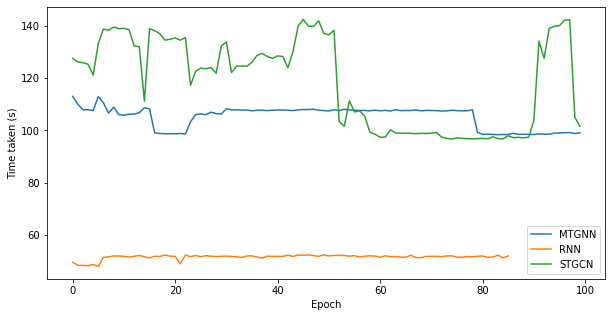

In [83]:
plt.figure(figsize=(10, 5))
# plt.plot(range(0,87), models['DCRNN']['PEMS_BAY_0.5']['time_taken'], label='DCRNN')
# plt.plot(range(0,100), models['GWNET']['PEMS_BAY_0.5']['time_taken'], label='GWNET')
plt.plot(range(0,100), models['MTGNN']['PEMS_BAY_0.5']['time_taken'], label='MTGNN')
plt.plot(range(0,86), models['RNN']['PEMS_BAY_0.5']['time_taken'], label='RNN')
plt.plot(range(0,100), models['STGCN']['PEMS_BAY_0.5']['time_taken'], label='STGCN')
plt.xlabel("Epoch")
plt.ylabel("Time taken (s)")
plt.legend()
plt.show()

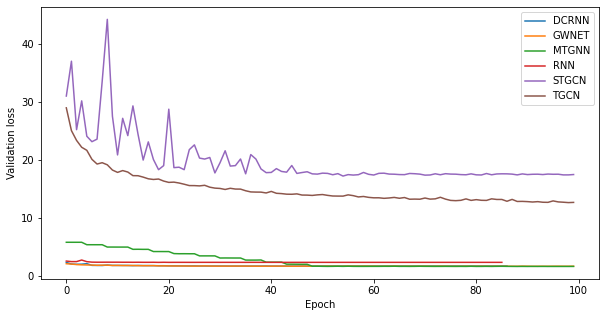

In [118]:
plt.figure(figsize=(10, 5))
plt.plot(range(0,87), models['DCRNN']['PEMS_BAY_0.5']['val_loss'], label='DCRNN')
plt.plot(range(0,100), models['GWNET']['PEMS_BAY_0.5']['val_loss'], label='GWNET')
plt.plot(range(0,100), models['MTGNN']['PEMS_BAY_0.5']['val_loss'], label='MTGNN')
plt.plot(range(0,86), models['RNN']['PEMS_BAY_0.5']['val_loss'], label='RNN')
plt.plot(range(0,100), models['STGCN']['PEMS_BAY_0.5']['val_loss'], label='STGCN')
plt.plot(range(0,100), models['TGCN']['PEMS_BAY']['val_loss'][:100], label='TGCN')
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

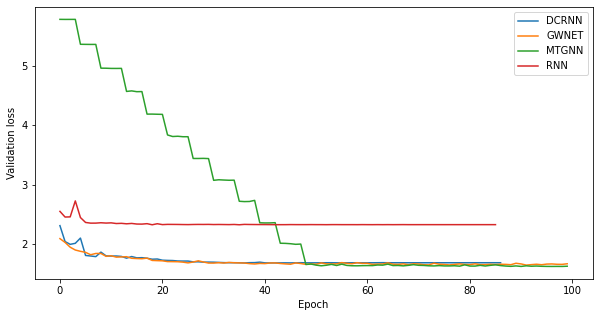

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(range(0,87), models['DCRNN']['PEMS_BAY_0.5']['val_loss'], label='DCRNN')
plt.plot(range(0,100), models['GWNET']['PEMS_BAY_0.5']['val_loss'], label='GWNET')
plt.plot(range(0,100), models['MTGNN']['PEMS_BAY_0.5']['val_loss'], label='MTGNN')
plt.plot(range(0,86), models['RNN']['PEMS_BAY_0.5']['val_loss'], label='RNN')
# plt.plot(range(0,100), models['STGCN']['PEMS_BAY_0.5']['val_loss'], label='STGCN')
plt.xlabel("Epoch")
plt.ylabel("Validation loss
plt.legend()
plt.show()

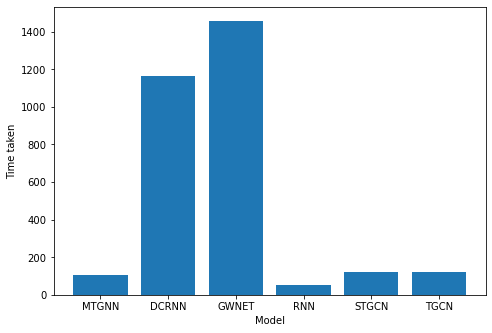

In [109]:
MTGNN = models['MTGNN']['PEMS_BAY_0.5']['time_taken'].mean()
DCRNN = models['DCRNN']['PEMS_BAY_0.5']['time_taken'].mean()
GWNET = models['GWNET']['PEMS_BAY_0.5']['time_taken'].mean()
RNN   = models['RNN']['PEMS_BAY_0.5']['time_taken'].mean()
STGCN = models['STGCN']['PEMS_BAY_0.5']['time_taken'].mean()
TGCN  = models['TGCN']['PEMS_BAY']['time_taken'].mean()

models_info = [MTGNN, DCRNN, GWNET, RNN, STGCN, TGCN]
models_name = ['MTGNN', 'DCRNN', 'GWNET', 'RNN', 'STGCN', 'TGCN']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models_name, models_info)
plt.xlabel("Model")
plt.ylabel("Time taken")
plt.show()

In [105]:
MTGNN = models['MTGNN']['PEMS_BAY_0.5']['time_taken']

In [104]:
MTGNN

0     112.99
1     110.03
2     107.86
3     107.95
4     107.56
       ...  
95     99.01
96     99.15
97     99.15
98     98.81
99     99.06
Name: time_taken, Length: 100, dtype: float64